Завдання 1

In [1]:

# Лабораторна робота №6-7
# Автор: Байков Олександр Сергійович ФІТ 4-11
# На парі  був


In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [20]:
# Завантаження датасету Iris
iris = load_iris()
x = iris.data

# Роздрукуємо перші 5 рядків датасету
pd.DataFrame(x, columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


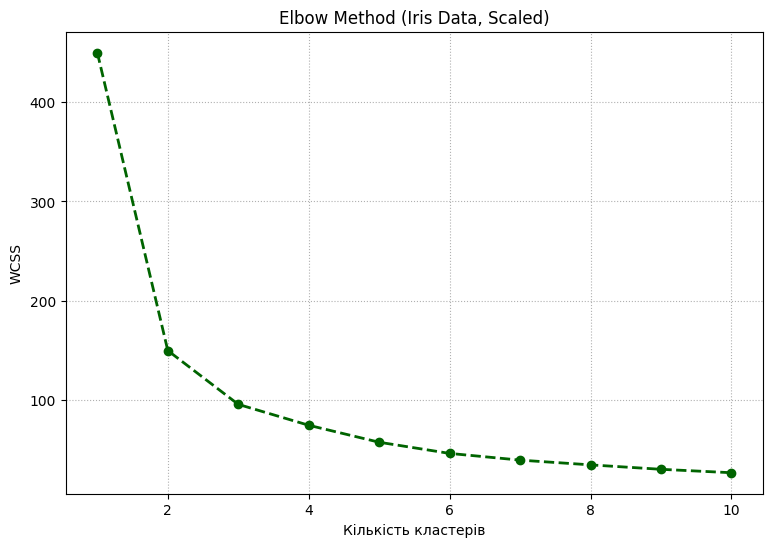

In [21]:
# Нормалізація даних
scaler = StandardScaler()
X_norm = scaler.fit_transform(x)

# Вибираємо всі стовпці, крім першого
X_2d = pd.DataFrame(X_norm, columns=iris.feature_names).iloc[:, 1:]

# Розрахунок WCSS для різних кількостей кластерів
wcss_vals = []
for k in range(1, 11):
    kmeans_model = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans_model.fit(X_2d)
    wcss_vals.append(kmeans_model.inertia_)

# Побудова графіка методу ліктя
plt.figure(figsize=(9, 6))
plt.plot(range(1, 11), wcss_vals, 'o--', color='darkgreen', linewidth=2)
plt.title('Elbow Method (Iris Data, Scaled)')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.grid(True, linestyle=':')
plt.show()


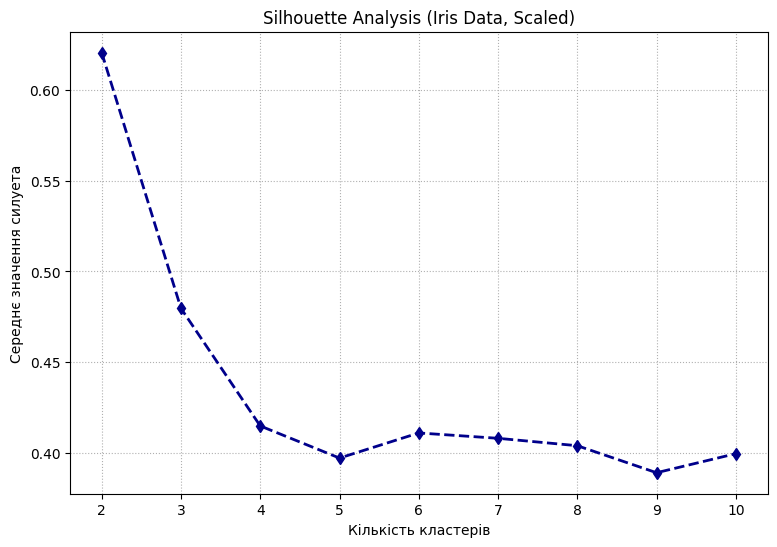

In [22]:
# Аналіз оптимальної кількості кластерів методом силуетів
sil_vals = []

for k in range(2, 11):  # мінімум два кластери
    km_model = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    labels = km_model.fit_predict(X_2d)
    sil_score = silhouette_score(X_2d, labels)
    sil_vals.append(sil_score)

# Візуалізація силуетів
plt.figure(figsize=(9, 6))
plt.plot(range(2, 11), sil_vals, 'd--', color='darkblue', linewidth=2)
plt.title('Silhouette Analysis (Iris Data, Scaled)')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середнє значення силуета')
plt.grid(True, linestyle=':')
plt.show()


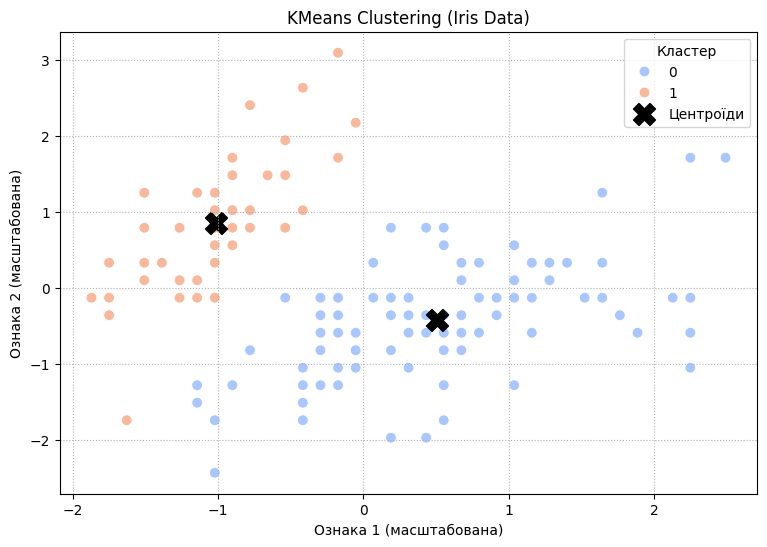

In [6]:
import seaborn as sns

# Кластеризація за допомогою KMeans
model = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42)
labels = model.fit_predict(X_scaled)

# Відображення кластерів
plt.figure(figsize=(9, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=labels, palette='coolwarm', s=60)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=250, c='black', marker='X', label='Центроїди')
plt.title('KMeans Clustering (Iris Data)')
plt.xlabel('Ознака 1 (масштабована)')
plt.ylabel('Ознака 2 (масштабована)')
plt.legend(title='Кластер')
plt.grid(True, linestyle=':')
plt.show()


Завдання 2

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

from google.colab import files

In [8]:
# Завантаження файлу
uploaded = files.upload()

Saving Student_data.csv to Student_data.csv


In [17]:
#Вивід даних з файлу
df = pd.read_csv('Student_data.csv')
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [10]:
#Виведення назв стовпців
print("Назва стовпців: ")
df.columns

Назва стовпців: 


Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
       'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
       'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
       'GradeClass'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [12]:
# Перевірка на пропущені значення
print("\nПеревірка на пропущені значення:")
df.isnull().sum()


Перевірка на пропущені значення:


,0
StudentID,0
Age,0
Gender,0
Ethnicity,0
ParentalEducation,0
StudyTimeWeekly,0
Absences,0
Tutoring,0
ParentalSupport,0
Extracurricular,0


In [13]:
# Перевірка наявності дублікатів
print("\nПеревірка наявності дублікатів:")
df.duplicated().sum()


Перевірка наявності дублікатів:


np.int64(0)

In [14]:
# Описова статистика
print("\nОписова статистика:")
df.describe()



Описова статистика:


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [ ]:
# Перетворення категоріальних даних у числові (якщо потрібно)
#df = pd.get_dummies(df, drop_first=True)

# Вибір ознак (X) та цільової змінної (y)
X = df.drop('GradeClass', axis=1)
y = df['GradeClass']

# Розділення даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабування ознак
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

1. Random forest

In [ ]:
# Параметри для пошуку
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Модель
rf = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

# Найкращі параметри та точність
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation accuracy for Random Forest:", grid_search_rf.best_score_)

# Оцінка на тестовій вибірці
y_pred_rf = grid_search_rf.predict(X_test)
print("Test accuracy for Random Forest:", accuracy_score(y_test, y_pred_rf))

Fitting 5 folds for each of 108 candidates, totalling 540 fits


2. Logistic regression

In [ ]:
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Модель
lr = LogisticRegression(random_state=42, max_iter=1000)

# GridSearchCV
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, cv=5, n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train, y_train)

# Найкращі параметри та точність
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)
print("Best cross-validation accuracy for Logistic Regression:", grid_search_lr.best_score_)

# Оцінка на тестовій вибірці
y_pred_lr = grid_search_lr.predict(X_test)
print("Test accuracy for Logistic Regression:", accuracy_score(y_test, y_pred_lr))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation accuracy for Logistic Regression: 0.7710333137396963
Test accuracy for Logistic Regression: 0.7432150313152401


3. Support Vector Machine

In [ ]:
# Параметри для пошуку
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Модель
svm = SVC(random_state=42)

# GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)
grid_search_svm.fit(X_train, y_train)

# Найкращі параметри та точність
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best cross-validation accuracy for SVM:", grid_search_svm.best_score_)

# Оцінка на тестовій вибірці
y_pred_svm = grid_search_svm.predict(X_test)
print("Test accuracy for SVM:", accuracy_score(y_test, y_pred_svm))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters for SVM: {'C': 10, 'gamma': 1, 'kernel': 'linear'}
Best cross-validation accuracy for SVM: 0.8557147348707502
Test accuracy for SVM: 0.824634655532359


Порівняння результатів

In [ ]:
# Виведення точності на тестовій вибірці для кожної моделі
print("Test accuracy for Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Test accuracy for Logistic Regression:", accuracy_score(y_test, y_pred_lr))
print("Test accuracy for SVM:", accuracy_score(y_test, y_pred_svm))

# Виведення звіту про класифікацію для найкращої моделі
print("Classification report for the best model (Random Forest, Logistic Regression, or SVM):")
print(classification_report(y_test, y_pred_rf))  # Або y_pred_lr, або y_pred_svm, залежно від найкращої моделі

Test accuracy for Random Forest: 0.9123173277661796
Test accuracy for Logistic Regression: 0.7432150313152401
Test accuracy for SVM: 0.824634655532359
Classification report for the best model (Random Forest, Logistic Regression, or SVM):
              precision    recall  f1-score   support

         0.0       0.91      0.45      0.61        22
         1.0       0.77      0.88      0.82        49
         2.0       0.89      0.87      0.88        85
         3.0       0.90      0.90      0.90        86
         4.0       0.96      0.98      0.97       237

    accuracy                           0.91       479
   macro avg       0.88      0.82      0.83       479
weighted avg       0.91      0.91      0.91       479



Метод ліктя

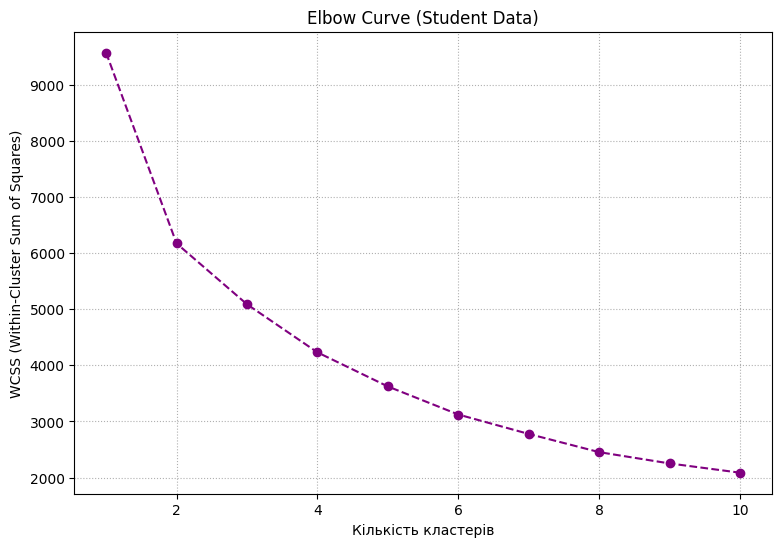

In [15]:
# Вибір числових даних для кластеризації
num_data = df[['Age', 'StudyTimeWeekly', 'Absences', 'GPA']]

# Нормалізація значень
scaler = StandardScaler()
X_norm = scaler.fit_transform(num_data)

# Метод ліктя для пошуку оптимальної кількості кластерів
distortions = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    km.fit(X_norm)
    distortions.append(km.inertia_)

# Побудова графіка "лікоть"
plt.figure(figsize=(9, 6))
plt.plot(range(1, 11), distortions, 'o--', color='purple')
plt.title('Elbow Curve (Student Data)')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True, linestyle=':')
plt.show()


Метод силуетів

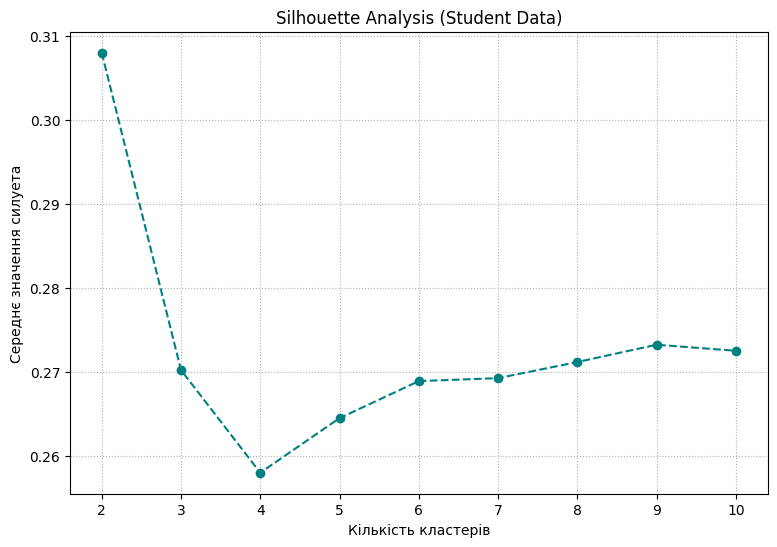

In [16]:
# Метод силуетів для визначення найкращої кількості кластерів
silhouette_vals = []

for k in range(2, 11):  # мінімум два кластери
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, random_state=42)
    labels = km.fit_predict(X_norm)
    score = silhouette_score(X_norm, labels)
    silhouette_vals.append(score)

# Побудова графіка коефіцієнтів силуетів
plt.figure(figsize=(9, 6))
plt.plot(range(2, 11), silhouette_vals, 'o--', color='teal')
plt.title('Silhouette Analysis (Student Data)')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середнє значення силуета')
plt.grid(True, linestyle=':')
plt.show()
